In [52]:
pip install networkx

DEPRECATION: Loading egg at c:\users\hkpen\anaconda3\lib\site-packages\ete3-3.1.3-py3.10.egg is deprecated. pip 23.3 will enforce this behaviour change. A possible replacement is to use pip for package installation..


In [106]:
import hdbscan
import pandas as pd
import numpy as np
#%matplotlib ipympl
#%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from sklearn import manifold
from ipywidgets import interact, Output
from IPython.display import clear_output
import networkx
from src.band_plotters import*

import sys
sys.path.append('..')
sys.path.append('../src')

from src.band_plotters import DATA_DIRECTORY
from src.cluster_plotters import plot_cluster_ellipses, plot_groups

In [89]:
FINGERPRINT_NAME = "12_bands_encoder"
FINGERPRINT_LENGTH = 128
PERPLEXITY = 30
FLAT_ONLY = True
BORING_COLUMNS = ["flat_segments", "flatness_score", "binary_flatness", "horz_flat_seg", "A", "B", "C", "D", "E", "F"]
INPUT_NAME = f"{FINGERPRINT_NAME}_perplexity_{PERPLEXITY}_length_{FINGERPRINT_LENGTH}.csv"

## Load Data

In [90]:
df = pd.read_csv(f"../fingerprints/{INPUT_NAME}", index_col="ID")
if FLAT_ONLY:
    df = df[df.horz_flat_seg>0]
df.head()

formula gen_formula  space_group  segments  flat_segments  \
ID                                                                 
2dm-3      TlS          AB            2         4              4   
2dm-21    TaI3         AB3          162         3              3   
2dm-22    Li2O         AB2          164         3              3   
2dm-25    VBr4         AB4          123         3              3   
2dm-29     SBr          AB            2         4              4   

        flatness_score  discovery  binary_flatness  horz_flat_seg  \
ID                                                                  
2dm-3          0.84646  bottom-up                1              3   
2dm-21         0.88201  bottom-up                1              1   
2dm-22         0.96678  bottom-up                1              4   
2dm-25         0.97834  bottom-up                1              2   
2dm-29         0.82037  bottom-up                1              3   

        exfoliation_eg  ...       120       121       122       123       124  \
ID                      ...                                                     
2dm-3         0.095794  ... -0.017306 -0.001280 -0.000032  0.026500 -0.028387   
2dm-21        0.097255  ... -0.017852  0.003230 -0.004377  0.027801 -0.028322   
2dm-22        0.037593  ... -0.015260  0.000234 -0.000312  0.026485 -0.034665   
2dm-25        0.140290  ... -0.017125  0.000265 -0.000738  0.029443 -0.031189   
2dm-29        0.067035  ... -0.017973 -0.001080  0.001013  0.030341 -0.031567   

             125       126       127         fx         fy  
ID                                                          
2dm-3  -0.007997  0.017296  0.024060 -12.527380  -2.879488  
2dm-21 -0.007310  0.015240  0.025054  24.153374 -11.525086  
2dm-22 -0.010404  0.025311  0.024728 -13.645481 -24.298070  
2dm-25 -0.007782  0.014831  0.025989   6.917726 -50.825756  
2dm-29 -0.008681  0.018918  0.023368 -27.316433 -50.111008  

[5 rows x 156 columns]

## Cluster

In [91]:
fingerprint_cols = [str(i) for i in range(FINGERPRINT_LENGTH)]
BORING_COLUMNS += fingerprint_cols

In [111]:
clusterer = hdbscan.HDBSCAN(algorithm='best', alpha=1.0, approx_min_span_tree=True,\
                        gen_min_span_tree=False, leaf_size=40, metric='manhattan', cluster_selection_method='leaf', min_cluster_size=4, min_samples=4, p=0.2)
clusterer.fit(df[fingerprint_cols])

df["labels"] = clusterer.labels_


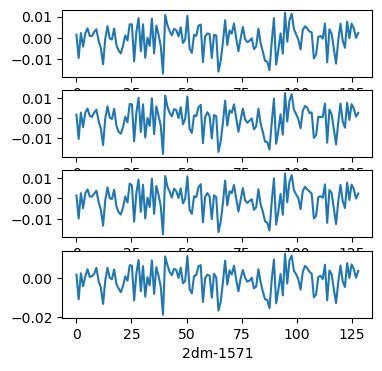

interactive(children=(IntSlider(value=18, description='label', max=38, min=-1), Output()), _dom_classes=('widg…

<function __main__.view_cluster(label)>

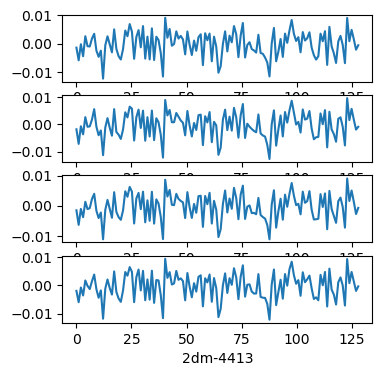

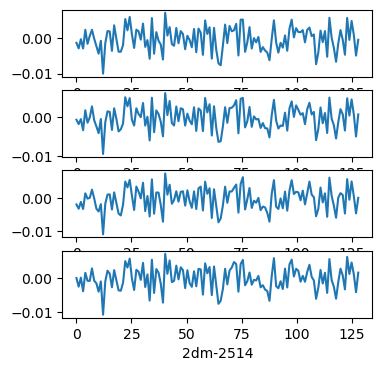

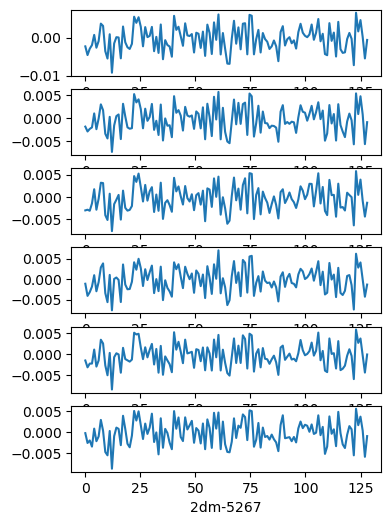

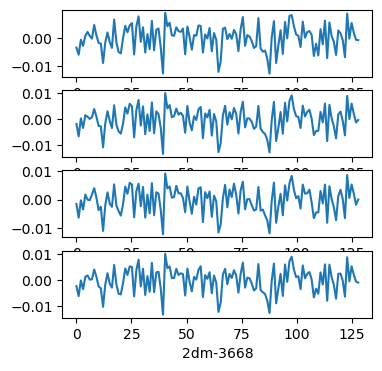

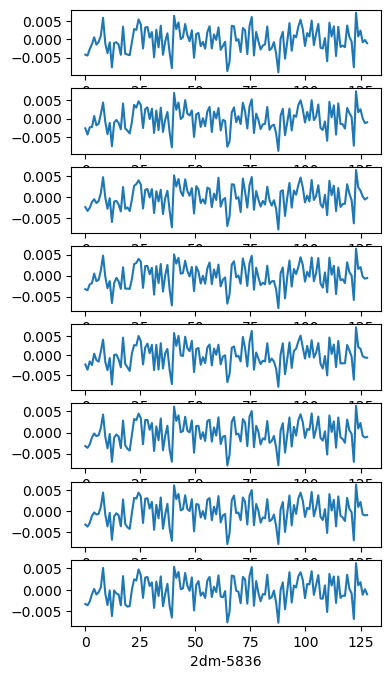

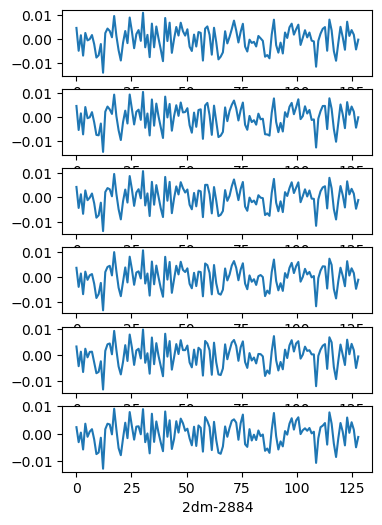

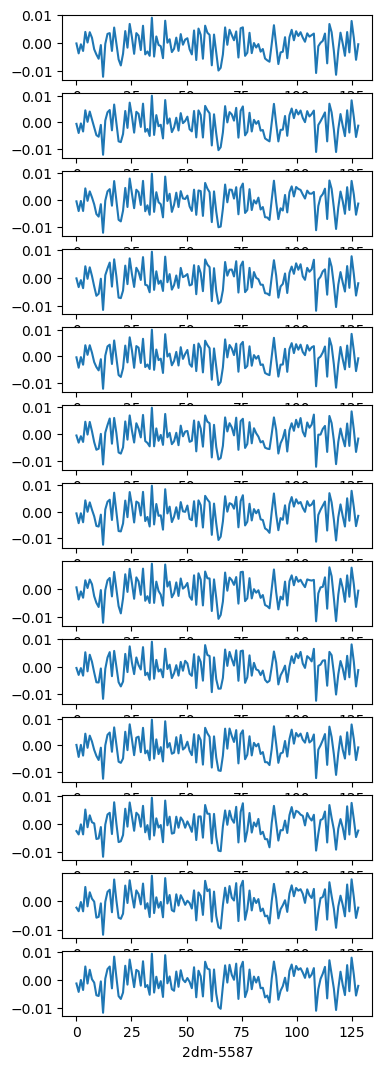

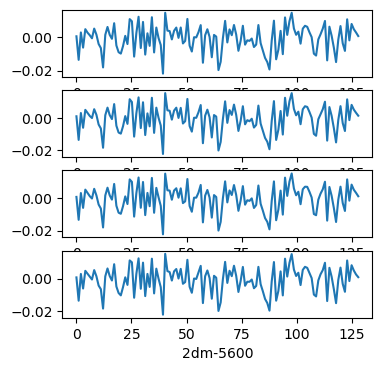

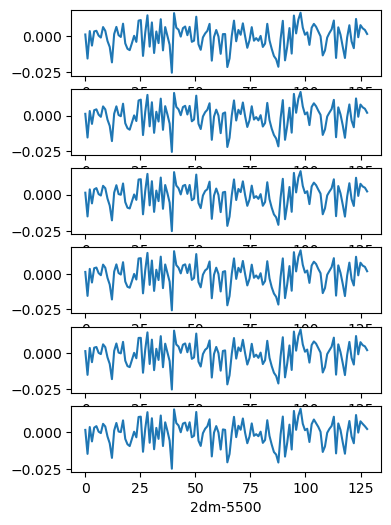

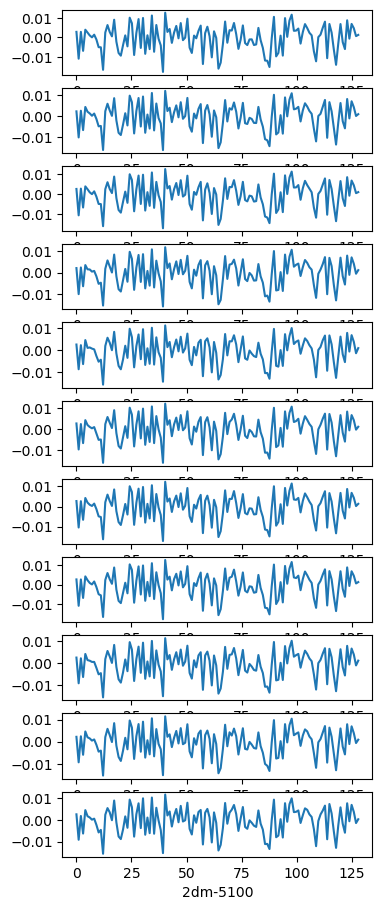

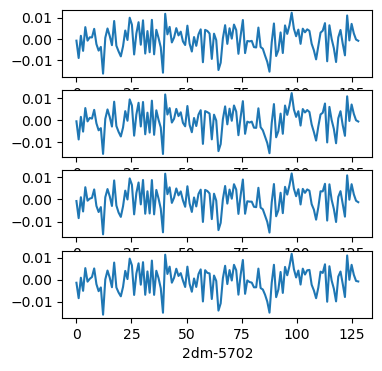

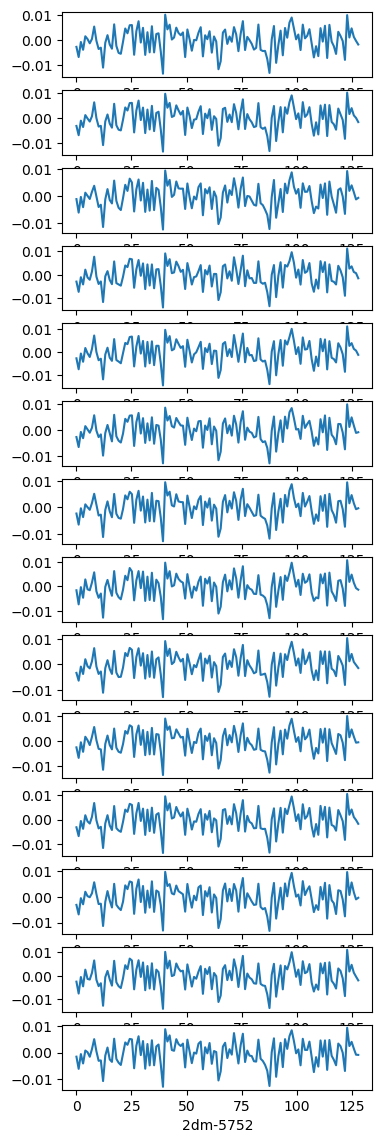

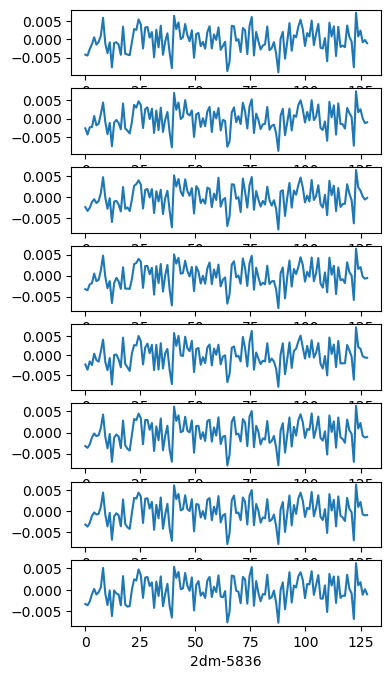

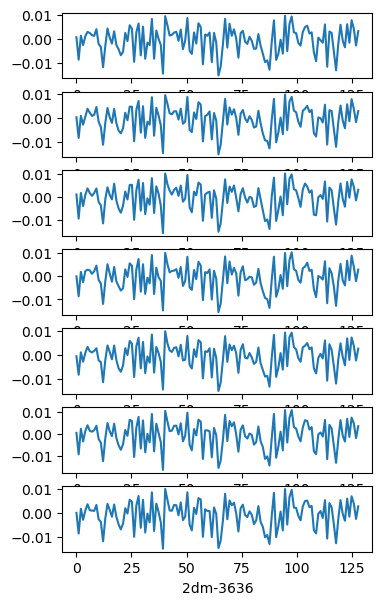

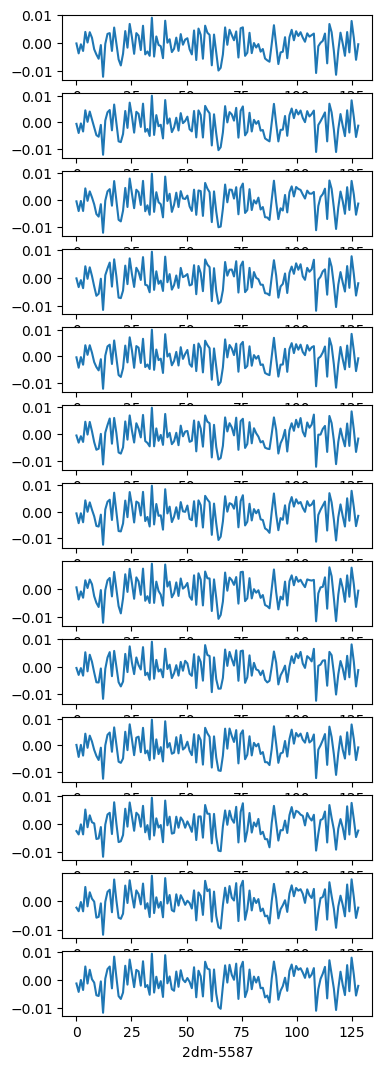

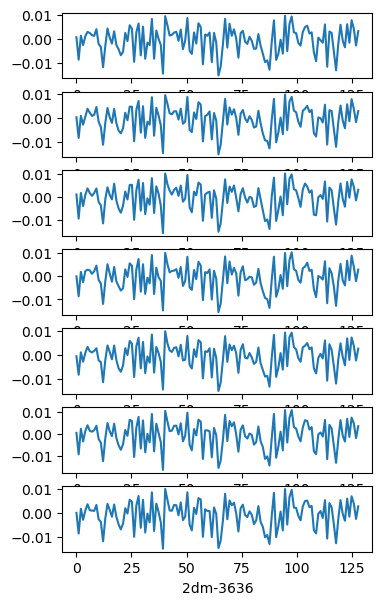

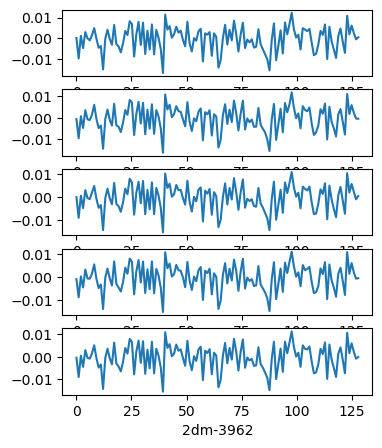

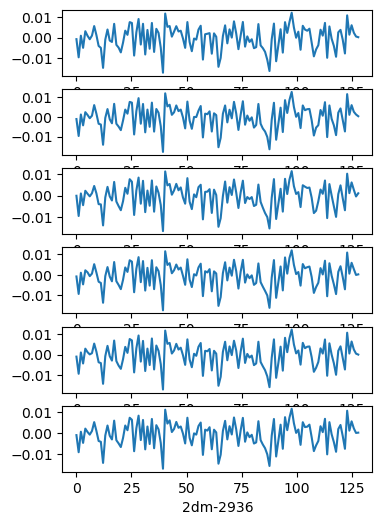

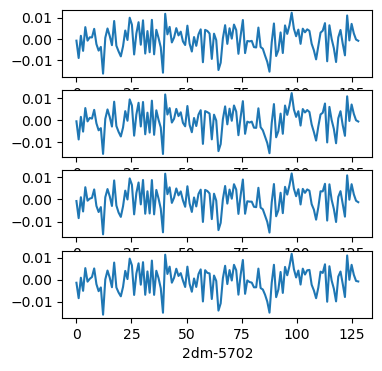

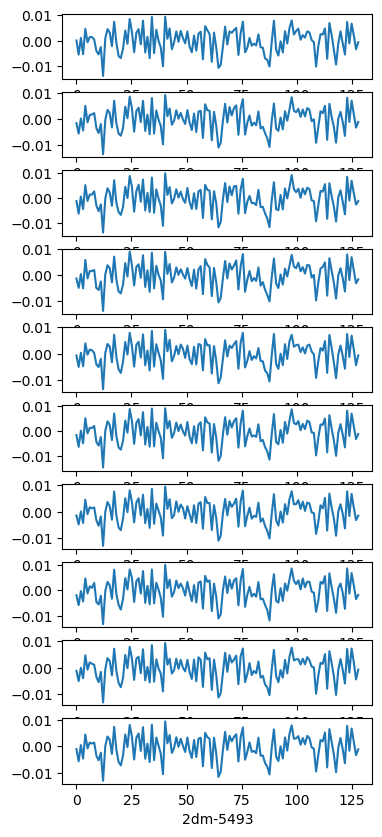

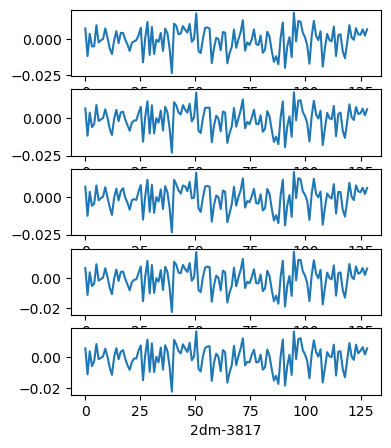

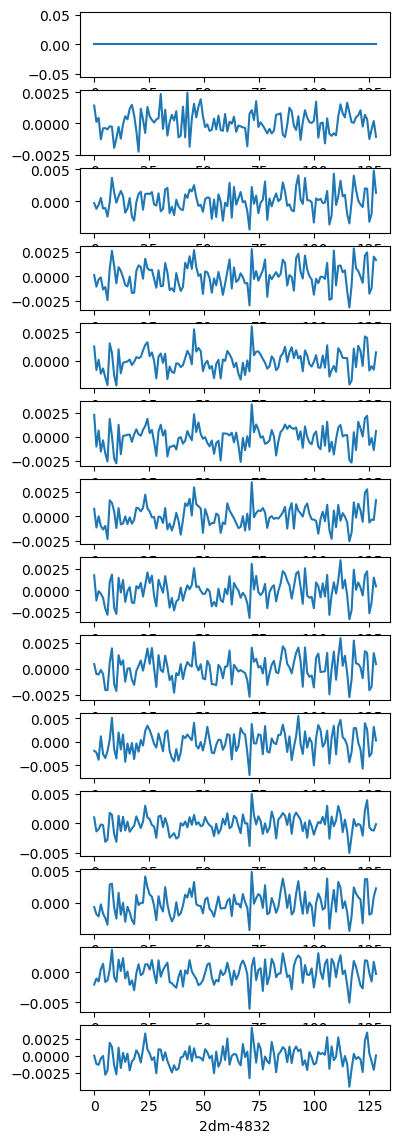

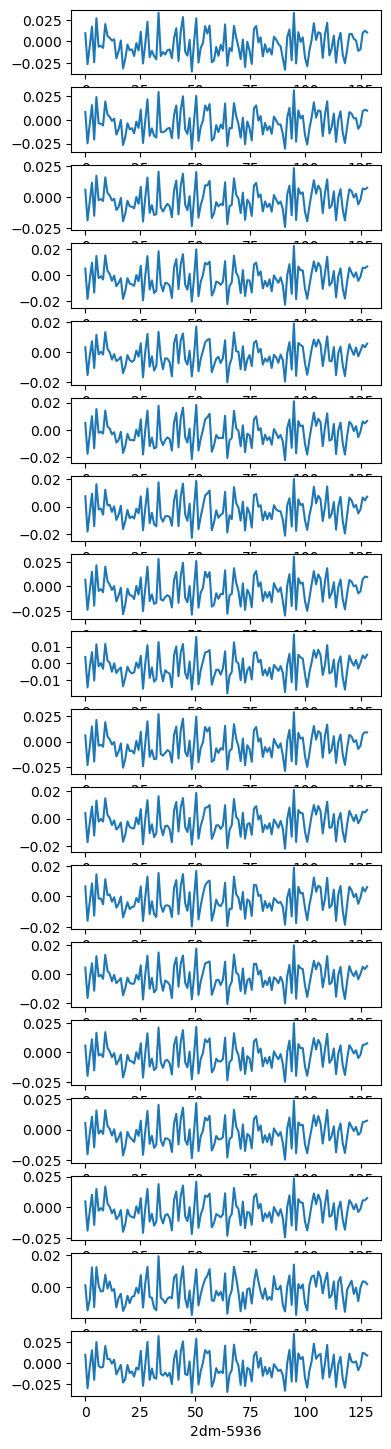

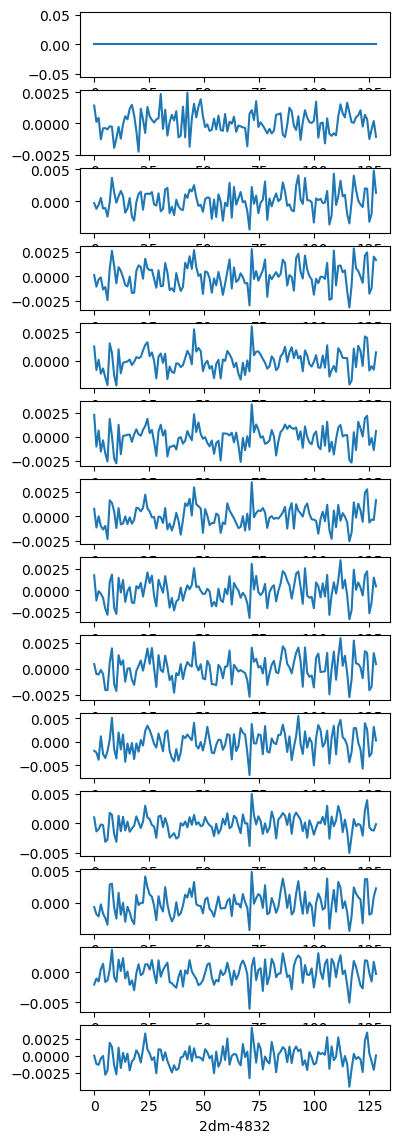

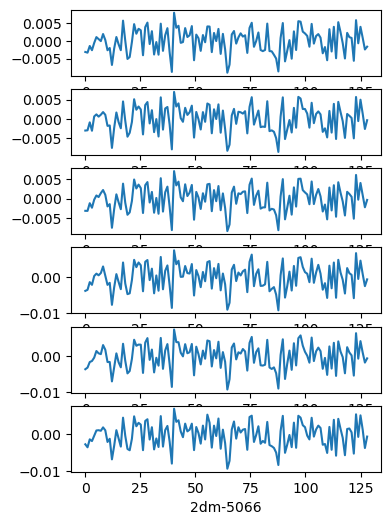

In [113]:
def view_cluster(label):
    display(df[df.labels==label].drop(BORING_COLUMNS, axis=1).head(100))

    num_plots = len(df[df.labels==label])

    fig, ax = plt.subplots(num_plots, 1, figsize=(4, 1*num_plots))

    for i, index in enumerate(df[df.labels==label].index):
        #ax[i].plot(np.linspace(0, FINGERPRINT_LENGTH, FINGERPRINT_LENGTH), df.loc[index][fingerprint_cols])
        # plot version with some print from cluster 0 subtracted, to better visualise the fingerprint differences
        ax[i].plot(np.linspace(0, FINGERPRINT_LENGTH, FINGERPRINT_LENGTH), df.loc[index][fingerprint_cols]-np.array(df[df.labels==1][fingerprint_cols])[0])
        ax[i].set_xlabel(index)
    for i, index in enumerate(df[df.labels==label].index):
        # plot real band structure
        plot(index)
    

interact(view_cluster, label=(-1, len(np.unique(df.labels))-2, 1))

## Rerun TSNE (ONLY IF ON FLAT SUBSET)

In [100]:
if FLAT_ONLY:
    tsne = manifold.TSNE(n_components=2, early_exaggeration=12.0, init="pca",learning_rate=100, random_state=0, perplexity=20 ,n_iter=10000, verbose=2)
    fingerprint_2d = tsne.fit_transform(df[fingerprint_cols])
    df.fx, df.fy = fingerprint_2d[:, 0], fingerprint_2d[:, 1]

[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 2005 samples in 0.003s...
[t-SNE] Computed neighbors for 2005 samples in 0.116s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2005
[t-SNE] Computed conditional probabilities for sample 2000 / 2005
[t-SNE] Computed conditional probabilities for sample 2005 / 2005
[t-SNE] Mean sigma: 0.003760
[t-SNE] Computed conditional probabilities in 0.175s
[t-SNE] Iteration 50: error = 71.1738586, gradient norm = 0.0215440 (50 iterations in 1.080s)
[t-SNE] Iteration 100: error = 68.1136703, gradient norm = 0.0034690 (50 iterations in 0.724s)
[t-SNE] Iteration 150: error = 67.7897186, gradient norm = 0.0009464 (50 iterations in 0.795s)
[t-SNE] Iteration 200: error = 67.7129517, gradient norm = 0.0003801 (50 iterations in 0.785s)
[t-SNE] Iteration 250: error = 67.6874084, gradient norm = 0.0001249 (50 iterations in 0.772s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.687408
[t-SNE] Iteration 300: erro

[t-SNE] Iteration 4150: error = 0.8707092, gradient norm = 0.0004398 (50 iterations in 0.745s)
[t-SNE] Iteration 4200: error = 0.8705832, gradient norm = 0.0004119 (50 iterations in 0.703s)
[t-SNE] Iteration 4250: error = 0.8704526, gradient norm = 0.0004389 (50 iterations in 0.776s)
[t-SNE] Iteration 4300: error = 0.8704032, gradient norm = 0.0003586 (50 iterations in 0.726s)
[t-SNE] Iteration 4350: error = 0.8702265, gradient norm = 0.0008164 (50 iterations in 0.656s)
[t-SNE] Iteration 4400: error = 0.8701268, gradient norm = 0.0003731 (50 iterations in 0.803s)
[t-SNE] Iteration 4450: error = 0.8700451, gradient norm = 0.0003312 (50 iterations in 0.748s)
[t-SNE] Iteration 4500: error = 0.8700107, gradient norm = 0.0003909 (50 iterations in 0.772s)
[t-SNE] Iteration 4550: error = 0.8698646, gradient norm = 0.0004131 (50 iterations in 0.721s)
[t-SNE] Iteration 4600: error = 0.8697364, gradient norm = 0.0005590 (50 iterations in 0.717s)
[t-SNE] Iteration 4650: error = 0.8696625, gradien

[t-SNE] Iteration 8500: error = 0.8650923, gradient norm = 0.0002224 (50 iterations in 0.751s)
[t-SNE] Iteration 8550: error = 0.8651405, gradient norm = 0.0004302 (50 iterations in 0.725s)
[t-SNE] Iteration 8600: error = 0.8650692, gradient norm = 0.0001748 (50 iterations in 0.709s)
[t-SNE] Iteration 8650: error = 0.8650187, gradient norm = 0.0002721 (50 iterations in 0.646s)
[t-SNE] Iteration 8700: error = 0.8650506, gradient norm = 0.0001654 (50 iterations in 0.788s)
[t-SNE] Iteration 8750: error = 0.8650031, gradient norm = 0.0002055 (50 iterations in 0.777s)
[t-SNE] Iteration 8800: error = 0.8648816, gradient norm = 0.0003838 (50 iterations in 0.716s)
[t-SNE] Iteration 8850: error = 0.8649089, gradient norm = 0.0002867 (50 iterations in 0.751s)
[t-SNE] Iteration 8900: error = 0.8649538, gradient norm = 0.0003290 (50 iterations in 0.763s)
[t-SNE] Iteration 8950: error = 0.8648914, gradient norm = 0.0002734 (50 iterations in 0.766s)
[t-SNE] Iteration 9000: error = 0.8648165, gradien

## Plots

C:\Users\hkpen\AppData\Local\Temp\ipykernel_11152\3628650646.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('turbo')


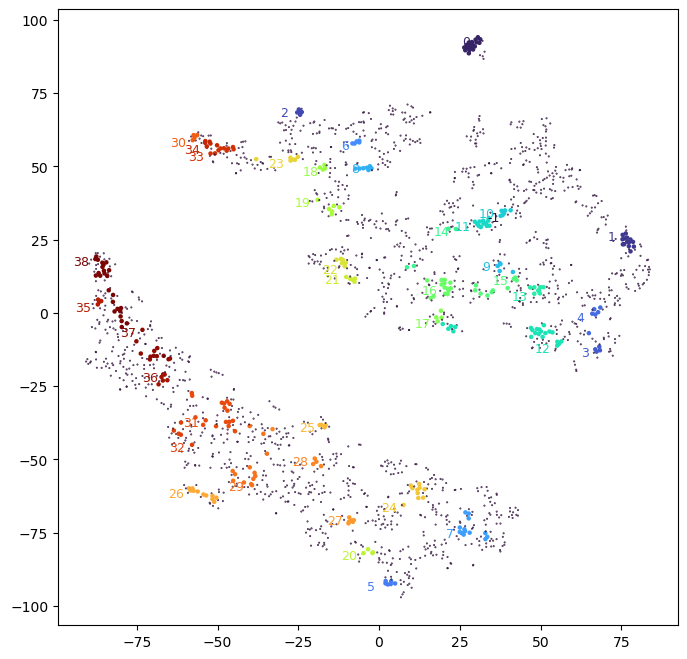

In [112]:
labels = clusterer.labels_

fig = plt.figure(figsize=(8,8))
size=np.ones((len(labels),1))*5
size[labels==-1]=0.2
 
unique_label,cluster_rep_index, counts = np.unique(labels, return_index=True, return_counts=True)
cmap = plt.cm.get_cmap('turbo')
norm = matplotlib.colors.Normalize(vmin=min(labels), vmax=max(labels))
    
for rep_id in cluster_rep_index:
        col=cmap(norm(labels[rep_id]))
        plt.annotate(labels[rep_id],fingerprint_2d[rep_id,:]+[-4.5,-1],color=col,alpha=1, weight='normal', ha='center', va='center', size=9).draggable()

plt.scatter(fingerprint_2d[:,0], fingerprint_2d[:,1],s=size, c=labels*5, cmap="turbo")
plt.show()

# HIERARCHY

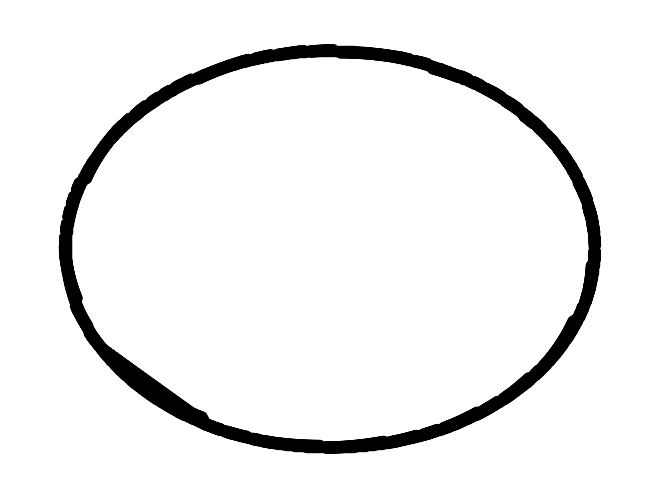

In [79]:
#clusterer.condensed_tree_.plot()
options = {
    'node_color': 'black',
    'node_size': 50,
    'width': 5,
}

#nx.draw_shell(G, nlist=[range(5,10), range(5)], **options)
networkx.draw_shell(clusterer.condensed_tree_.to_networkx(), **options)

Output()

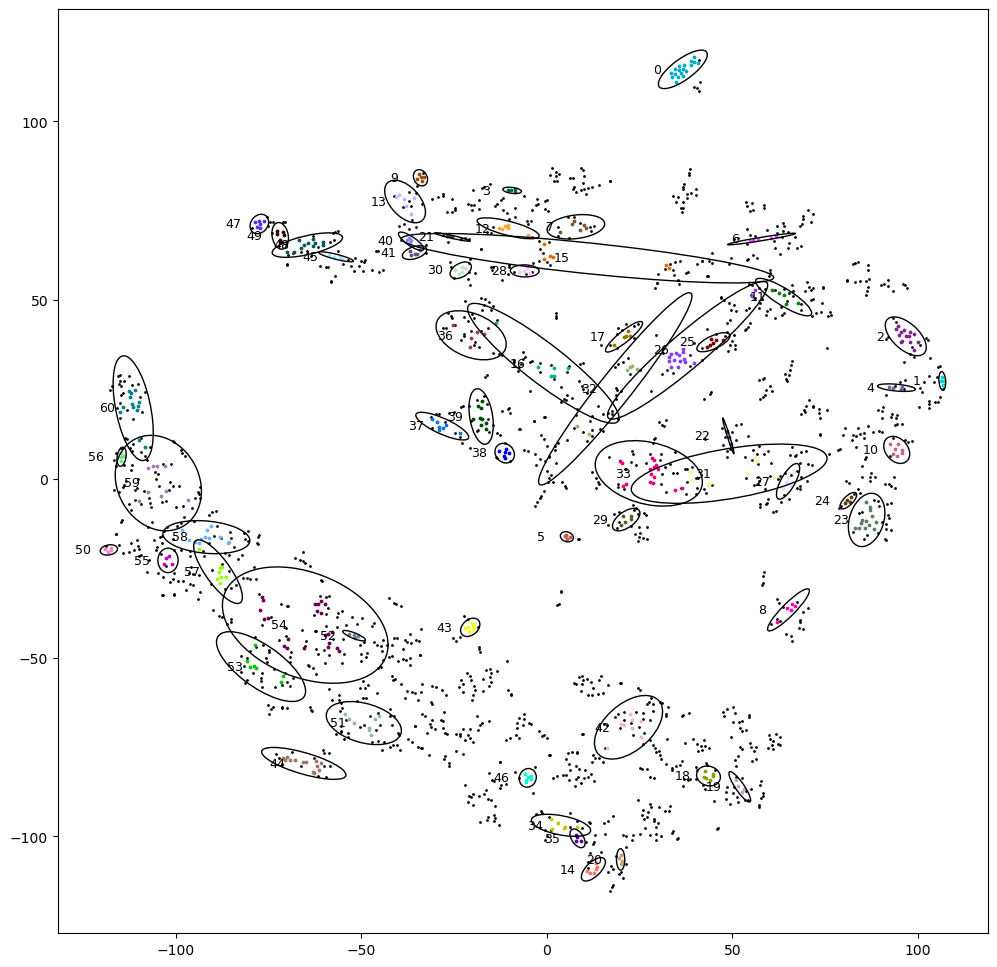

In [80]:
out = Output()

@out.capture()
def onclick(event):
    clear_output()
    closest = np.sqrt((event.xdata-df.fx)**2 + (event.ydata-df.fy)**2).idxmin()
    label = df.labels.loc[closest]
    print(f"Clicked on material {closest} in cluster {label}")
    display(df[df.labels == label].drop(BORING_COLUMNS, axis=1))
display(out)

fig, ax = plt.subplots(figsize=(12, 12))
ax = plot_groups(df,"labels", ax=ax)
ax = plot_cluster_ellipses(df, ax=ax, color="black")
# ax.legend()

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()

Output()

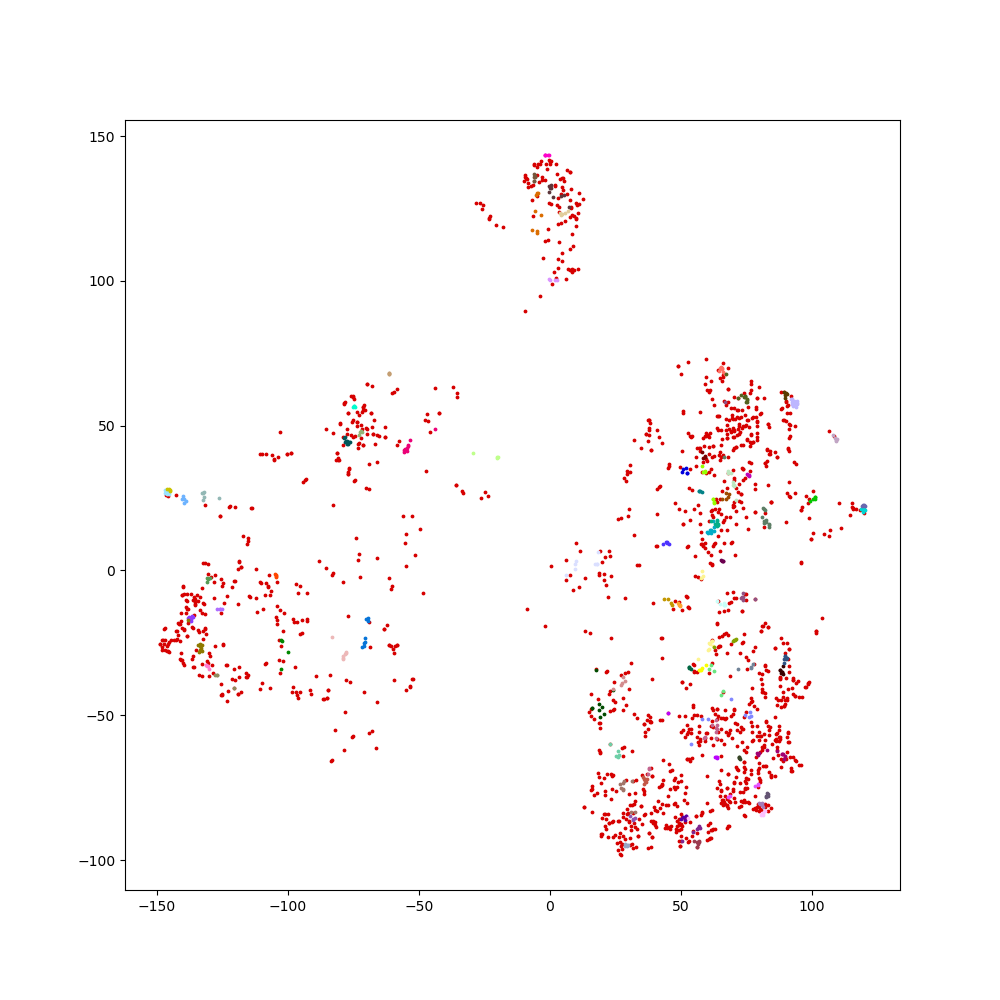

In [12]:
out = Output()

@out.capture()
def onclick(event):
    clear_output()
    closest = np.sqrt((event.xdata-df.fx)**2 + (event.ydata-df.fy)**2).idxmin()
    label = df.labels.loc[closest]
    print(f"Clicked on material {closest} in cluster {label}")
    display(df[df.labels == label].drop(BORING_COLUMNS, axis=1))
display(out)

fig, ax = plt.subplots(figsize=(10, 10))
ax = plot_groups(df,"labels", ax=ax)
#ax = plot_cluster_ellipses(df, ax=ax, color="black")
# ax.legend()

fig.canvas.mpl_connect('button_press_event', onclick)

plt.show()